In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 1. Loading the data

In [3]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]

In [6]:
number_GPUS = len(tf.config.list_physical_devices('GPU'))
if number_GPUS:
    print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
else :
    print("No GPUs available :(")

Num GPUs Available:  1


label is 4


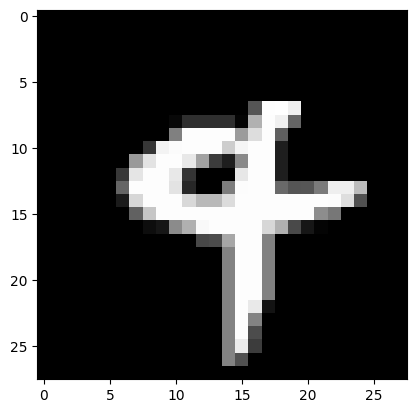

In [7]:
# exploring the data
i = np.random.randint(y_train.size)

print("label is", y_train[i])
plt.imshow(train_data[0][i], cmap='gray')
plt.show()

# 2. Building the model

We use Keras to build a fully-connected neural network.

For more details, see https://keras.io/guides/training_with_built_in_methods/

In [8]:
# source : https://keras.io/guides/training_with_built_in_methods/

def build_model():
    inputs = keras.Input(shape=(784,), name="digits")
    x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(32, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
    return model

model = build_model()

loss = keras.losses.sparse_categorical_crossentropy

model.summary()

I0000 00:00:1737987875.817500    3006 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ digits (InputLayer)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

As we can see, the number of parameters to optimise in this lab, i.e the dimension of the Vector $\theta$, is : 26,506. In the beginning, the model is initialised with random weights and not zero as one might think ! This is because starting from zero essentially computes huge gradients, making the model weight update unstable. Moreover, starting from random weights makes the convergence faster, it reduces the number of iterations.

In [15]:
print(model.trainable_weights)

[<Variable path=dense_1/kernel, shape=(784, 32), dtype=float32, value=[[ 0.03266909  0.01676944  0.06883935 ...  0.0356755  -0.03766349
  -0.08132578]
 [-0.00585467  0.05809069 -0.01978034 ...  0.04725463  0.04076984
  -0.04083237]
 [ 0.048846    0.01838725 -0.08382583 ... -0.02967487 -0.01973692
   0.07168648]
 ...
 [-0.04976108 -0.06698325 -0.06504177 ... -0.04549981 -0.05536588
   0.08394992]
 [ 0.00909196  0.06182548  0.03871474 ... -0.07238568 -0.08078574
   0.05441978]
 [ 0.0375762   0.00751967  0.08288997 ... -0.00970547 -0.0562927
   0.02358779]]>, <Variable path=dense_1/bias, shape=(32,), dtype=float32, value=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]>, <Variable path=dense_2/kernel, shape=(32, 32), dtype=float32, value=[[ 0.2181721   0.15478885  0.25845727 ... -0.2501274  -0.24006414
  -0.16121924]
 [ 0.14620239 -0.16543268  0.123907   ... -0.08835213 -0.05901578
   0.06275693]
 [-0.15291075 -0.1977394  -0.01166111 ... -

Down below, we see the results of a Neural Network initialized with random weights and no optimisation.

In [11]:
# untrained model
predicted_probas = model(x_train)
y_pred = np.argmax(predicted_probas, 1) # the prediction is the class with highest probability
y_pred[0:30]

array([9, 5, 9, 4, 9, 5, 9, 9, 9, 5, 9, 9, 6, 9, 9, 9, 5, 9, 2, 2, 5, 5,
       4, 4, 2, 9, 5, 9, 9, 5])

In [12]:
# what we would like to get
y_train[0:30]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7], dtype=uint8)

In [77]:
predicted_probas = model(x_train)
y_pred = np.argmax(predicted_probas, 1) # the prediction is the class with highest probability
accuracy = keras.metrics.Accuracy()
accuracy.update_state(y_pred,y_train)
print(f"The accuracy of the just initialized model is : {accuracy.result().numpy()}")

The accuracy of the just initialized model is : 0.8130000233650208


The accuracy rate is indeed <b>Awful</b>.  
We will down below use the gradient descent algorithm to decrease the loss to a minimum.

# 3. Computing gradients

We are now going to implement the stochastic gradient method using the Keras functionalities. 

First, we need to understand how to compute gradients using auto-differentation (also called **backpropagation**).

In [16]:
# Source: https://keras.io/guides/writing_a_custom_training_loop_in_tensorflow/

# Example of gradient computation using automatic differentiation

# selecting a batch
x_train_batch = x_train[:8]
y_train_batch = y_train[:8]

# Open a GradientTape to record the operations run
# during the forward pass, which enables auto-differentiation.
with tf.GradientTape() as tape:
        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
    
        logits = model(x_train_batch)  # Logits for this minibatch (the logits are the name we give to the Neural Network output)

        # Compute the loss value for this minibatch.
        loss_value = loss(y_train_batch, logits) # getting the loss function

# Use the gradient tape to automatically retrieve
# the gradients of the trainable variables with respect to the loss.
grad = tape.gradient(loss_value, model.trainable_weights)

We also define two important helper functions.

In [17]:
## update the weights by adding real_factor * update
def update_weights(model, update, real_factor = 1.):
    new_weights = model.trainable_weights.copy()
    
    # iterate over all layers
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + real_factor * update[i]
        
    model.set_weights(new_weights)


# Evaluate model
def mean_loss(model, X, Y):
    logits = model(X)
    return np.mean(loss(Y, logits))

In [18]:
# evaluating the train loss on the whole dataset
# this is a costly operation, use sparsely
mean_loss(model, x_train, y_train)

2.3495471

# 4. Training the model

A classical gradient descent algorithm might be better and more precise in our case. However, with an input size of $60000$ images, as in our case, it may be computationally expensive.  

We shall then use the stochastic gradient algorithm as seen in the course, with an appropriate learning rate. The SGD algorith states:

Take $$x_{o} \in \R^n$$

$$ \forall k \geq 0, j \sim U(1,..,n), x_{k+1} = x_{k} - \gamma \nabla g_{j}(x_{k})$$

with $g$ a loss function defined in the optimisation problem.

In our case, we will take a random image from the training set and a random image from the accuracy set, we will compute the predicted image and the loss. Finally, we will update the weights using gradient descent.


It is good practice to seperate the computation in chunks, or to create what we call <b>checkpoints</b>. We use tensorflow's <b>save_weights</b> function to save the weights in a <b>h5</b> file.

Down below we have the SGD Algorithm, but for only a batch size of 1.

In [24]:
# Stochastic gradient algorithm
mean_list = []
def SGD(model, x_train, y_train, learning_rate, epochs=1, batch_size=1,load_weights=False):
        
        try :

            if load_weights:
                 model.load_weights('./model1.weights.h5')

            for epoch in range(epochs*x_train.shape[0] // 10):
                
                # Converting to Tensor in order to speed up computation
                random_index = np.random.randint(0,x_train.shape[0])   
                x_train_sample = tf.convert_to_tensor(x_train[random_index:random_index+batch_size])
                y_train_sample = tf.convert_to_tensor(y_train[random_index:random_index+batch_size])

                # computing the gradient 
                with tf.GradientTape() as tape:
                    logits = model(x_train_sample,training=True)
                    loss_value = loss(y_train_sample, logits)

                # updating the weight
                gradient = tape.gradient(loss_value,model.trainable_weights) 
                update_weights(model,gradient,-learning_rate)

                # We will save the weights every 100 iterations
                if epoch % 100 == 0 and epoch != 0:
                    mean_list.append(mean_loss(model,x_train,y_train))
                    model.save_weights('./model1.weights.h5')
                    print(f"loss at iteration {epoch} is: {mean_list[-1]}")

            model.save_weights('./model1.weights.h5')
        
        # If we wish to interrupt the program early
        except KeyboardInterrupt:
            
            model.save_weights('./weights/model1.weights.h5')
        

In [25]:
# initialize model and training it
model_1 = build_model()
# Taking a learning rate of 0.001, just like in the course 
learning_rate = 10e-3
SGD(model=model_1,x_train=x_train,y_train=y_train,learning_rate=learning_rate,epochs=1,batch_size=1)

loss at iteration 100 is: 2.199049234390259
loss at iteration 200 is: 1.9629794359207153
loss at iteration 300 is: 1.722861647605896
loss at iteration 400 is: 1.4024981260299683
loss at iteration 500 is: 1.3166697025299072
loss at iteration 600 is: 1.0879132747650146
loss at iteration 700 is: 0.9878661036491394
loss at iteration 800 is: 0.8516339659690857
loss at iteration 900 is: 0.8136354684829712
loss at iteration 1000 is: 0.765991747379303
loss at iteration 1100 is: 0.7787178158760071
loss at iteration 1200 is: 0.7233442664146423
loss at iteration 1300 is: 0.7477877140045166
loss at iteration 1400 is: 0.6554996371269226
loss at iteration 1500 is: 0.7936630845069885
loss at iteration 1600 is: 0.5729916095733643
loss at iteration 1700 is: 0.7638705968856812
loss at iteration 1800 is: 0.6056573987007141
loss at iteration 1900 is: 0.6753626465797424
loss at iteration 2000 is: 0.5283988118171692
loss at iteration 2100 is: 0.572670578956604
loss at iteration 2200 is: 0.5572274923324585
l

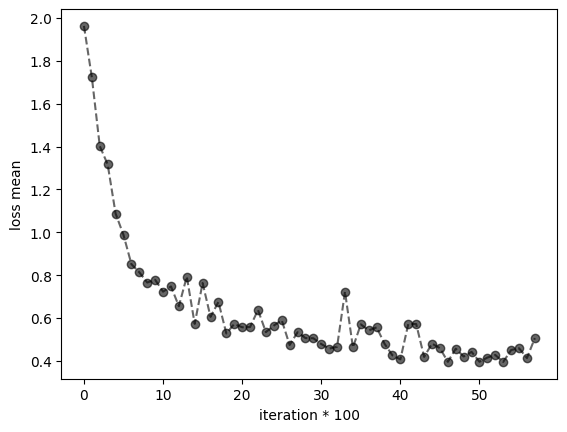

In [27]:
x = np.arange(len(mean_list[1:]))
plt.plot(x,mean_list[1:],marker='o',color='black',linestyle='--',alpha=0.6)
plt.ylabel('loss mean')
plt.xlabel('iteration * 100')
plt.show()

In [32]:
model_1.load_weights('./model1.weights.h5')
# Predicting over all of the images
predicted_probas = model_1(x_train)
y_pred = np.argmax(predicted_probas, 1)
accuracy = keras.metrics.Accuracy()
accuracy.update_state(y_train,y_pred)

# getting the accuracy
print(f"The accuracy of the model after the first algorithm is:{accuracy.result().numpy()}")

The accuracy of the model after the first algorithm is:0.8658833503723145


As we can see, there is improvment compared to the previous model, but we can do much better, mainly by increasing the number of iterations or batches.

In [36]:
# Stochastic gradient algorithm
mean_list_2 = []
def SGD(model, x_train, y_train, learning_rate,iterations,epochs=1,batch_size=1,load_model=False):
        
        if load_model:
             model.load_weights('./model2.weights.h5')

        try:

            for iteration in range(iterations):

                for epoch in range(epochs):
                   
                    random_index = np.random.randint(0,x_train.shape[0])   
                    
                    # Getting the tensors
                    x_train_sample = tf.convert_to_tensor(x_train[random_index:random_index+batch_size])
                    y_train_sample = tf.convert_to_tensor(y_train[random_index:random_index+batch_size])

                    with tf.GradientTape() as tape:
                        logits = model(x_train_sample,training=True)
                        loss_value = loss(y_train_sample, logits)

                    gradient = tape.gradient(loss_value,model.trainable_weights) 
                    update_weights(model,gradient,-learning_rate)

                if iteration % 100 == 0:
                    mean_list_2.append(mean_loss(model,x_train,y_train))
                    model.save_weights('./model2.weights.h5')
                    print(f"loss at iteration {iteration} is: {mean_list_2[-1]}")

        except KeyboardInterrupt:
            
            model.save_weights('./model2.weights.h5')

In [37]:
# initialize model
model_2 = build_model()
learning_rate = 0.001
# Staring the algorithm
SGD(model=model_2,x_train=x_train,y_train=y_train,learning_rate=learning_rate,epochs=5,iterations=6000)

loss at iteration 0 is: 2.3719944953918457
loss at iteration 100 is: 2.22094464302063
loss at iteration 200 is: 2.1091148853302
loss at iteration 300 is: 1.9772090911865234
loss at iteration 400 is: 1.8302221298217773
loss at iteration 500 is: 1.6680041551589966
loss at iteration 600 is: 1.5062644481658936
loss at iteration 700 is: 1.3631075620651245
loss at iteration 800 is: 1.2391390800476074
loss at iteration 900 is: 1.1285748481750488
loss at iteration 1000 is: 1.0269829034805298
loss at iteration 1100 is: 0.9350135922431946
loss at iteration 1200 is: 0.8722078204154968
loss at iteration 1300 is: 0.8095595836639404
loss at iteration 1400 is: 0.7437946200370789
loss at iteration 1500 is: 0.7000132203102112
loss at iteration 1600 is: 0.6663657426834106
loss at iteration 1700 is: 0.6291037797927856
loss at iteration 1800 is: 0.6022249460220337
loss at iteration 1900 is: 0.5829768776893616
loss at iteration 2000 is: 0.5670514106750488
loss at iteration 2100 is: 0.5375603437423706
loss 

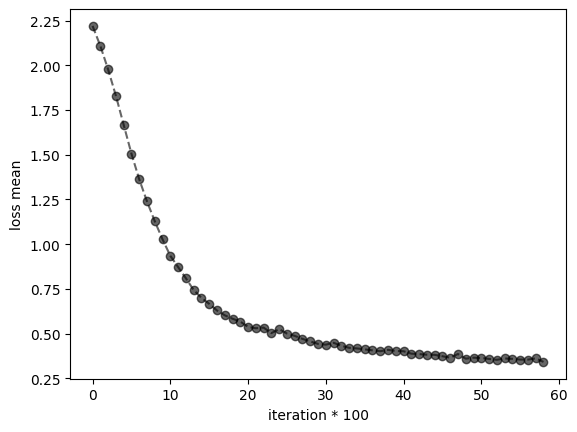

In [39]:
x = np.arange(len(mean_list_2[1:]))
# plotting the results 
plt.plot(x,mean_list_2[1:],marker='o',color='black',linestyle='--',alpha=0.6)
plt.ylabel('loss mean')
plt.xlabel('iteration * 100')
plt.show()

In [42]:
# predicting the outcome
predicted_probas = model_2(x_train)
y_pred = np.argmax(predicted_probas, 1)
# Getting the accuracy of the model with this version of SGD
accuracy = keras.metrics.Accuracy()
accuracy.update_state(y_pred,y_train)

print(f"The accuracy of the model after the second algorithm is: {accuracy.result().numpy()}")

The accuracy of the model after the second algorithm is: 0.9033666849136353


We will now work on batches, i.e we will calcuate the mean gradient of some batches of size $B$. Down below is the code wich computes this alogirthm.

In [69]:
# Stochastic gradient algorithm
mean_list_3 = []
def SGD(model, x_train, y_train, learning_rate,epochs=1,batch_size=1,load_saves=False):

    if load_saves:
        model.load_weights('./model3.weights.h5')

    try :       
        for epoch in range(epochs * x_train.shape[0] // batch_size):

            random_indexes = np.random.randint(0,x_train.shape[0],size=(batch_size,))   
            
            # Converting to tensor for faster compuatation
            x_train = tf.convert_to_tensor(x_train)
            y_train = tf.convert_to_tensor(y_train) 

            # Gathering the samples
            x_train_sample = tf.gather(x_train,random_indexes)
            y_train_sample = tf.gather(y_train,random_indexes)

            with tf.GradientTape() as tape:
                logits = model(x_train_sample,training=True)
                # Computing the mean of the gradient
                loss_value = tf.reduce_mean(loss(y_train_sample, logits))

            # Getting the gradient
            gradient = tape.gradient(loss_value,model.trainable_weights)
            update_weights(model,gradient,-learning_rate)

            if epoch % 100 == 0:
                model.save_weights('./model3.weights.h5')
                mean_list_3.append(mean_loss(model,x_train,y_train))
                print(f"loss at iteration {epoch} is: {mean_list_3[-1]}")
    
    except KeyboardInterrupt:
        
        model.save_weights('./model3.weights.h5')

In [70]:
# initialize model
model_3 = build_model()
learning_rate = 0.001
# Here, we chose a batch size of 50, because why not
SGD(model=model_3,x_train=x_train,y_train=y_train,learning_rate=learning_rate,epochs=10,batch_size=100)

loss at iteration 0 is: 2.3606631755828857
loss at iteration 100 is: 2.3185503482818604
loss at iteration 200 is: 2.285102128982544
loss at iteration 300 is: 2.256899118423462
loss at iteration 400 is: 2.2321763038635254
loss at iteration 500 is: 2.2080821990966797
loss at iteration 600 is: 2.184734582901001
loss at iteration 700 is: 2.161475896835327
loss at iteration 800 is: 2.1381306648254395
loss at iteration 900 is: 2.1138932704925537
loss at iteration 1000 is: 2.0887393951416016
loss at iteration 1100 is: 2.063267230987549
loss at iteration 1200 is: 2.036628484725952
loss at iteration 1300 is: 2.008391857147217
loss at iteration 1400 is: 1.9798266887664795
loss at iteration 1500 is: 1.950136423110962
loss at iteration 1600 is: 1.9193845987319946
loss at iteration 1700 is: 1.8880789279937744
loss at iteration 1800 is: 1.855967402458191
loss at iteration 1900 is: 1.8228310346603394
loss at iteration 2000 is: 1.789271593093872
loss at iteration 2100 is: 1.7554289102554321
loss at it

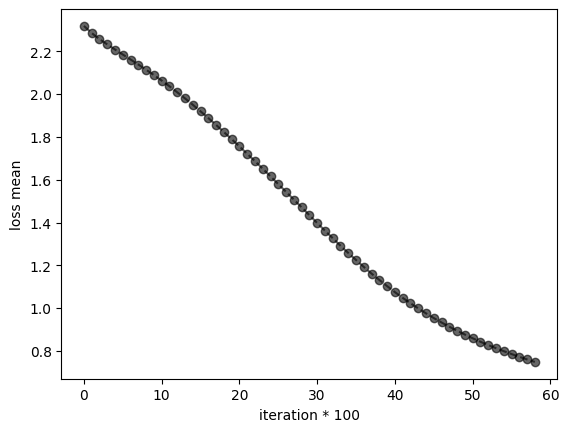

In [71]:
x = np.arange(len(mean_list_3[1:]))
# Plotting the results
plt.plot(x,mean_list_3[1:],marker='o',color='black',linestyle='--',alpha=0.6)
plt.ylabel('loss mean')
plt.xlabel('iteration * 100')
plt.show()

In [72]:
# Computing the accuracy
predicted_probas = model_3(x_train)
y_pred = np.argmax(predicted_probas, 1)
accuracy = keras.metrics.Accuracy()
accuracy.update_state(y_pred,y_train)

print(f"The accuracy of the model after the third algorithm is: {accuracy.result().numpy()}")

The accuracy of the model after the third algorithm is: 0.8157833218574524


In [75]:
# Here we shall compare the model's accuracy according to the algorithm used
model = build_model()
model.load_weights('./model1.weights.h5')

predicted_probas = model(x_train)
y_pred = np.argmax(predicted_probas, 1)
accuracy = keras.metrics.Accuracy()
accuracy.update_state(y_pred,y_train)

print(f"The accuracy of the model after the first algorithm is: {accuracy.result().numpy()}")

model.load_weights('./model2.weights.h5')
predicted_probas = model(x_train)
y_pred = np.argmax(predicted_probas, 1)
accuracy = keras.metrics.Accuracy()
accuracy.update_state(y_pred,y_train)

print(f"The accuracy of the model after the second algorithm is: {accuracy.result().numpy()}")

model.load_weights('./model3.weights.h5')
predicted_probas = model(x_train)
y_pred = np.argmax(predicted_probas, 1)
accuracy = keras.metrics.Accuracy()
accuracy.update_state(y_pred,y_train)

print(f"The accuracy of the model after the third algorithm is: {accuracy.result().numpy()}")

The accuracy of the model after the first algorithm is: 0.8658833503723145
The accuracy of the model after the second algorithm is: 0.9017333388328552
The accuracy of the model after the third algorithm is: 0.8130000233650208


The second algorithm seems to have more precision, which makes sense since it iterates more times than the other two algorithms.